In [1]:
"""
This is code is forked from : https://gist.github.com/xmfbit/b27cdbff68870418bdb8cefa86a2d558
"""
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import pandas as pd

/home/pramod/.local/lib/python3.5/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.23) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [6]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/home/pramod/Downloads/datasets/hymenoptera/hymenoptera_data/'

image_datasets = {x: dset.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=1,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

use_gpu = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
def resnet_feat():
    import torchvision.models as models
    
    model = models.resnet101(pretrained=True)
    modules=list(model.children())[:-1]
    model=nn.Sequential(*modules)
    model.eval()
    if use_gpu:
        print('yes')
        model = model.cuda()
    return model

In [8]:
data = "/home/pramod/Downloads/datasets/hymenoptera/hymenoptera_data/train"

In [75]:
model = resnet_feat()
feature_df = pd.DataFrame()
feature_array = np.zeros(2049)
i = 0

import pdb
for inputs,labels in dataloaders['train']:
    
    #pdb.set_trace()
    if use_gpu:
        test_inputs = Variable(inputs.cuda())
    else: test_inputs = Variable(inputs)

    test_outputs = model(test_inputs)
    test_outputs = test_outputs.cpu().data.numpy()        

    test_outputs = np.squeeze(test_outputs)
    # sometimes due to the selection of a particular batch size 
    # the output becomes a 1d vector instead of bsize X dim 2d vector
    if (len(test_outputs.shape) != 2):
        test_outputs = np.reshape(test_outputs,(1, -1))
    #print(feature_array.shape, test_outputs.shape)
    test_outputs = test_outputs.squeeze()
    labels = labels.cpu().data.numpy()
    #print(type(labels))
    #print(np.concatenate((test_outputs,labels)))
    feature_array = np.vstack((feature_array,np.concatenate((test_outputs,labels))))
 
    
    i += 1


yes


In [76]:
feature_array[1,:2048]

array([0.25317648, 0.31434679, 0.19426523, ..., 0.54315615, 0.71881837,
       0.38491136])

In [77]:
feature_df = pd.DataFrame(feature_array)
feature_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.253176,0.314347,0.194265,0.304360,0.126769,0.025214,0.720638,1.354701,0.892415,0.201532,...,0.360603,0.032435,0.245688,0.655365,0.206817,0.372618,0.543156,0.718818,0.384911,1.0
2,0.207062,0.258597,0.215836,1.454679,0.155842,0.079913,0.821571,0.339387,0.357010,0.173593,...,0.674192,0.130840,0.095818,0.052037,0.074627,0.145132,1.863678,0.084063,0.109274,0.0
3,0.061153,0.443277,0.216279,0.140506,0.195329,0.030139,0.329575,0.827013,0.796565,0.320575,...,0.199867,0.651178,0.017805,0.034681,0.084648,0.389725,1.370985,0.652818,0.078608,0.0
4,0.255079,0.904488,0.268422,0.113940,0.319880,0.101274,0.314059,0.181799,1.026683,0.258534,...,0.296097,0.476216,0.303084,0.225264,0.080697,0.524647,1.578965,0.197853,0.759704,0.0


In [89]:
#feature_df.loc[:,2048] = feature_df.loc[:,2048].astype(int)
feature_df = feature_df.rename(columns={2048:'labels'})

In [90]:
feature_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,labels
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.253176,0.314347,0.194265,0.304360,0.126769,0.025214,0.720638,1.354701,0.892415,0.201532,...,0.360603,0.032435,0.245688,0.655365,0.206817,0.372618,0.543156,0.718818,0.384911,1.0
2,0.207062,0.258597,0.215836,1.454679,0.155842,0.079913,0.821571,0.339387,0.357010,0.173593,...,0.674192,0.130840,0.095818,0.052037,0.074627,0.145132,1.863678,0.084063,0.109274,0.0
3,0.061153,0.443277,0.216279,0.140506,0.195329,0.030139,0.329575,0.827013,0.796565,0.320575,...,0.199867,0.651178,0.017805,0.034681,0.084648,0.389725,1.370985,0.652818,0.078608,0.0
4,0.255079,0.904488,0.268422,0.113940,0.319880,0.101274,0.314059,0.181799,1.026683,0.258534,...,0.296097,0.476216,0.303084,0.225264,0.080697,0.524647,1.578965,0.197853,0.759704,0.0


# TSNE

In [91]:
import time

from sklearn.manifold import TSNE

#n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(feature_array[:2048])


print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 245 samples in 0.007s...
[t-SNE] Computed neighbors for 245 samples in 0.218s...
[t-SNE] Computed conditional probabilities for sample 245 / 245
[t-SNE] Mean sigma: 7.199435
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.645935
[t-SNE] Error after 300 iterations: 0.749722
t-SNE done! Time elapsed: 1.4967613220214844 seconds


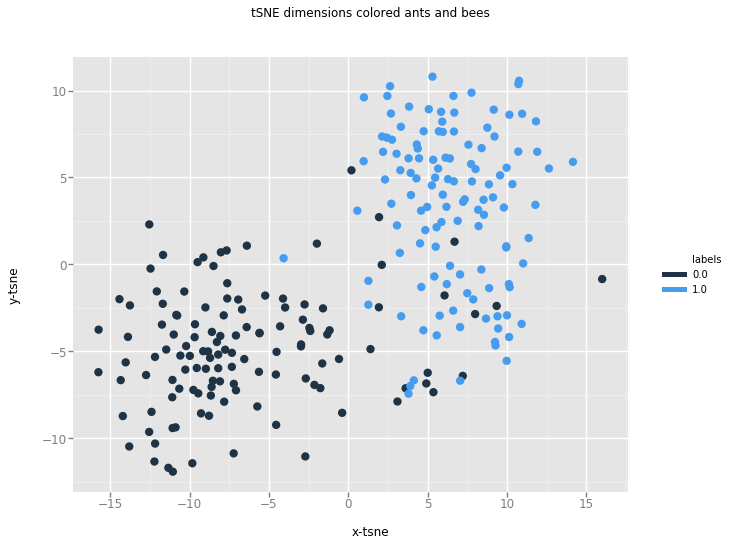

<ggplot: (8794134319915)>

In [98]:
from ggplot import *


df_tsne = feature_df.copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='labels') ) \
        + geom_point(size=70,alpha=1) \
        + ggtitle("tSNE dimensions colored ants and bees")\
        + scale_color_brewer(type='diverging', palette=4)
chart

In [28]:
df_tsne.head()

,0,1,2,3,4,5,6,7,8,9,...,2041,2042,2043,2044,2045,2046,2047,2048,x-tsne,y-tsne
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-11.207735,2.858280
1,0.401667,0.111825,0.275680,0.004657,0.559505,0.291924,0.210568,2.067171,0.318190,0.113047,...,0.169655,2.469715,0.223525,0.561635,0.172542,0.976269,0.178304,1.0,14.569829,11.405746
2,0.213519,0.301353,0.555071,0.135270,0.778576,0.011867,0.772305,1.262462,0.760914,0.110793,...,0.659421,0.115746,0.198285,0.787037,0.738862,0.564045,0.214679,0.0,-11.426700,-14.919976
3,0.119171,0.122084,1.018914,0.526996,0.150380,0.042538,0.710218,1.314044,0.169235,0.304617,...,0.069848,0.348110,0.392289,0.239607,0.473807,0.931634,0.087650,1.0,9.304784,9.692813
4,0.603585,0.680872,0.068160,1.064641,0.372371,0.236455,0.388206,0.985187,0.757480,0.272291,...,0.185946,0.419221,0.048003,0.185195,1.026794,0.222939,0.238252,1.0,1.423971,4.823733
